Universidad del Valle de Guatemala <br>
08/04/2022 <br>
Minería de Datos # 20 

# Hoja de Trabajo 6
## Regresión logística

**Integrantes:**<br>
Walter Saldaña 19897 <br>
José Gutierrez 19111 <br>
Javier Cotto 19324 <br>

### Importar modulos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn.cluster as cluster
import sklearn.metrics as metrics
import sklearn.preprocessing
import scipy.cluster.hierarchy as sch
import skfuzzy as fuzz
import pylab
import sklearn.mixture as mixture
import random
import math
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.datasets import load_nfl
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn import datasets
from scipy import stats
from sklearn.metrics import confusion_matrix as Confusion_Matrix
from sklearn.model_selection import train_test_split

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

### Carga de datos

In [2]:
entrenamiento = pd.read_csv('train.csv', encoding='unicode_escape')
entrenamiento.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
prueba = pd.read_csv('test.csv', encoding='unicode_escape')
prueba.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## 2) Preprocesamiento de los datos.

Remover variables cualitativas que no aportan, ya que no son categóricas, y sus frecuencias no pueden ser clasificadas.

In [4]:
entrenamiento = entrenamiento.drop(['Street', 'Id', 'MSZoning', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 
                         'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle','RoofStyle', 
                         'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
                         'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 
                         'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
                         'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive','PoolQC', 'Fence', 'MiscFeature', 
                         'SaleType', 'SaleCondition'], axis=1)

Eliminar filas que contengan datos nulos (NaN).

In [5]:
entrenamiento.dropna(subset = ["LotFrontage"], inplace = True)
entrenamiento.dropna(subset = ["MasVnrArea"], inplace = True)
entrenamiento.dropna(subset = ["GarageYrBlt"], inplace = True)

## Resumen estadístico de las variables

In [6]:
 entrenamiento.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,...,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000
mean,56.146298,70.665477,10122.956289,6.212310,5.561106,1972.264942,1985.683318,108.487957,438.399643,44.589652,...,92.610169,46.130241,21.844781,3.348796,16.100803,2.934880,23.429081,6.339875,2007.795718,185506.152542
std,41.772684,24.266812,8129.302641,1.380822,1.068236,30.967730,21.025974,189.500966,468.385038,157.828725,...,121.868623,64.390029,61.282083,29.772540,57.801829,40.222087,165.759816,2.687854,1.335043,82999.159004
min,20.000000,21.000000,1300.000000,2.000000,2.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,35311.000000
25%,20.000000,60.000000,7590.000000,5.000000,5.000000,1953.000000,1966.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,131000.000000
50%,50.000000,70.000000,9416.000000,6.000000,5.000000,1974.000000,1995.000000,0.000000,374.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,164900.000000
75%,70.000000,80.000000,11361.000000,7.000000,6.000000,2003.000000,2005.000000,170.000000,702.000000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,219500.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,648.000000,2500.000000,12.000000,2010.000000,755000.000000


### Normalizacion

In [7]:
def normalizer(column):
    return (column - column.mean())/(column.std())

for col in entrenamiento.columns:
    entrenamiento[col] = normalizer(entrenamiento[col])

## Analisis de Datos

### Eliminacion de datos atipicos

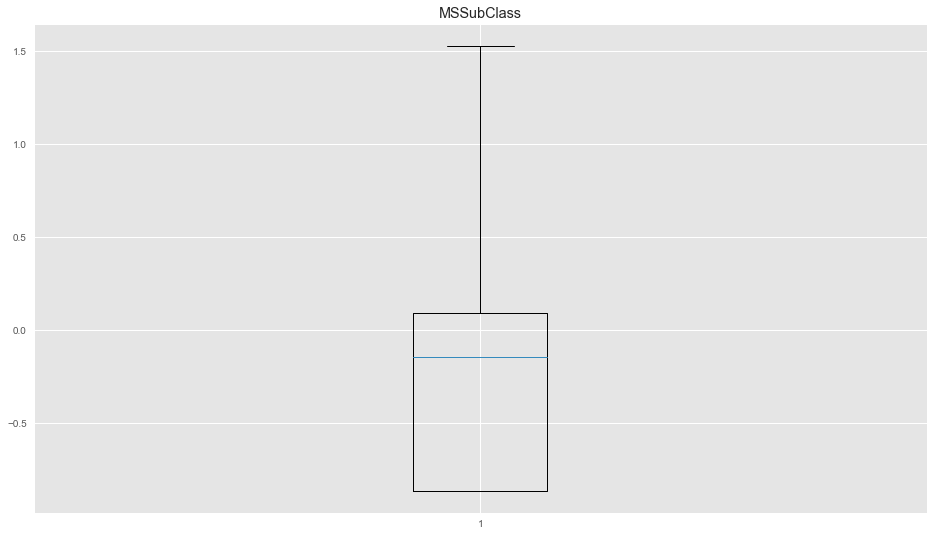

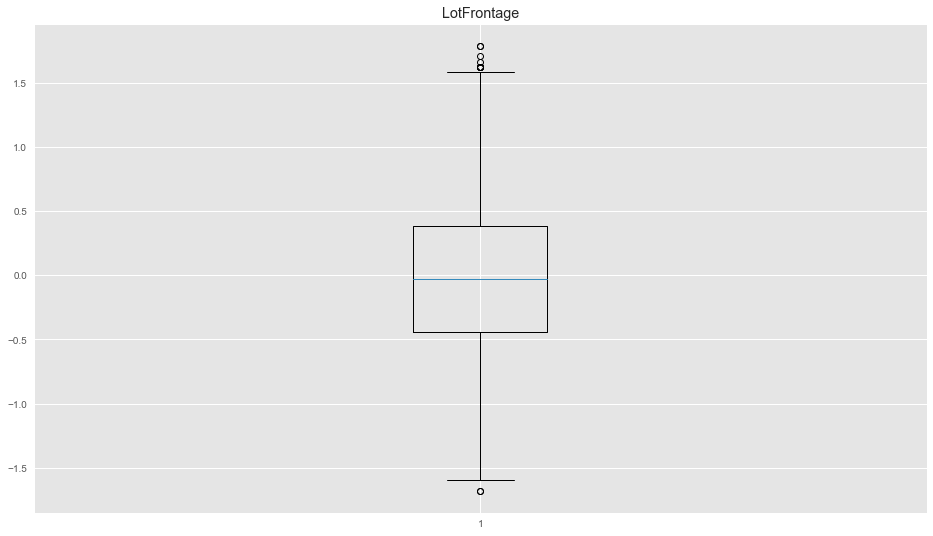

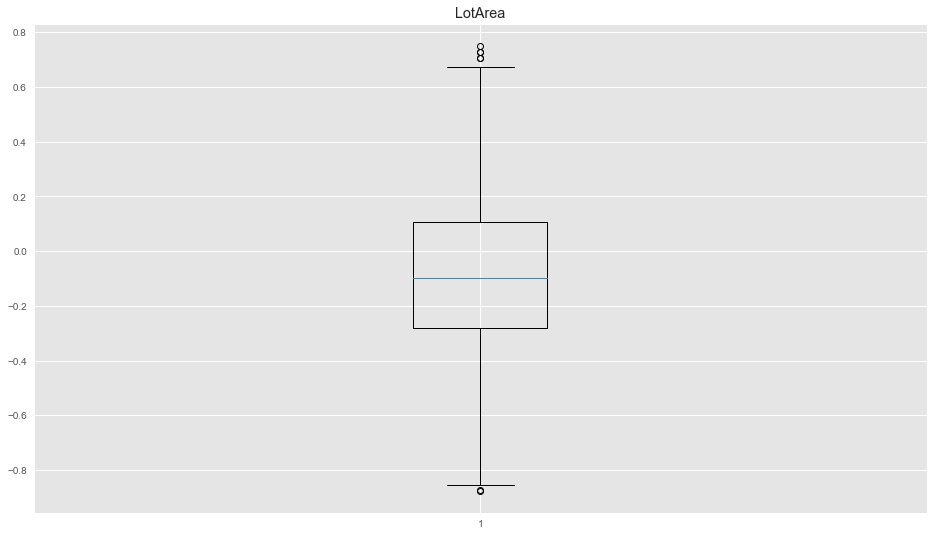

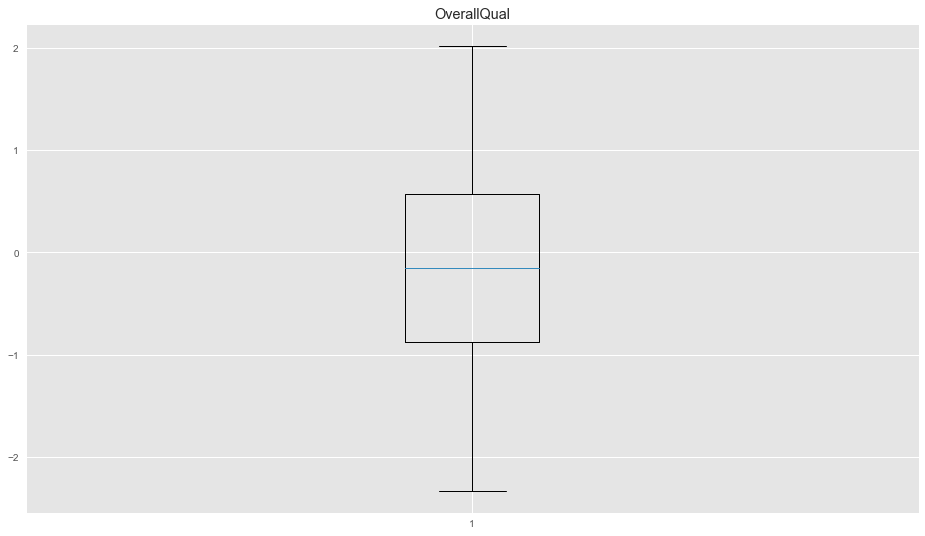

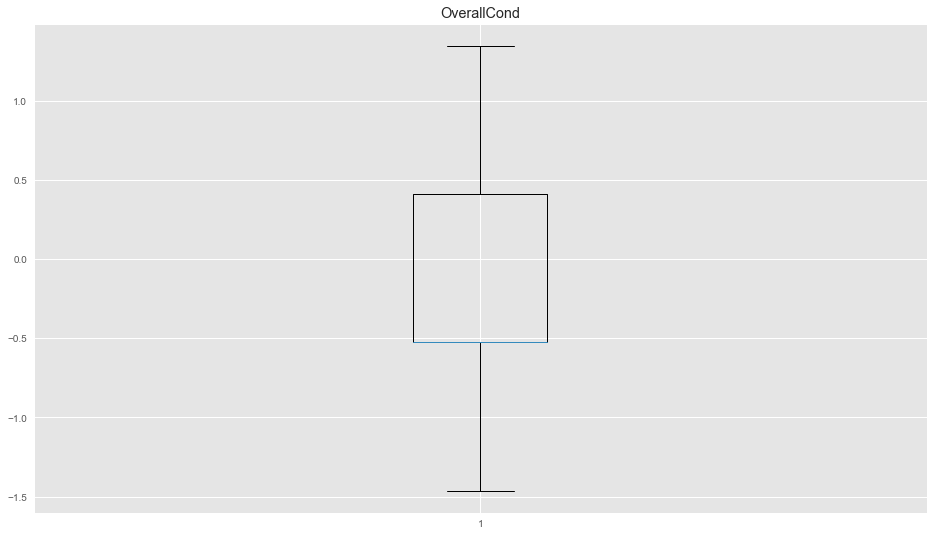

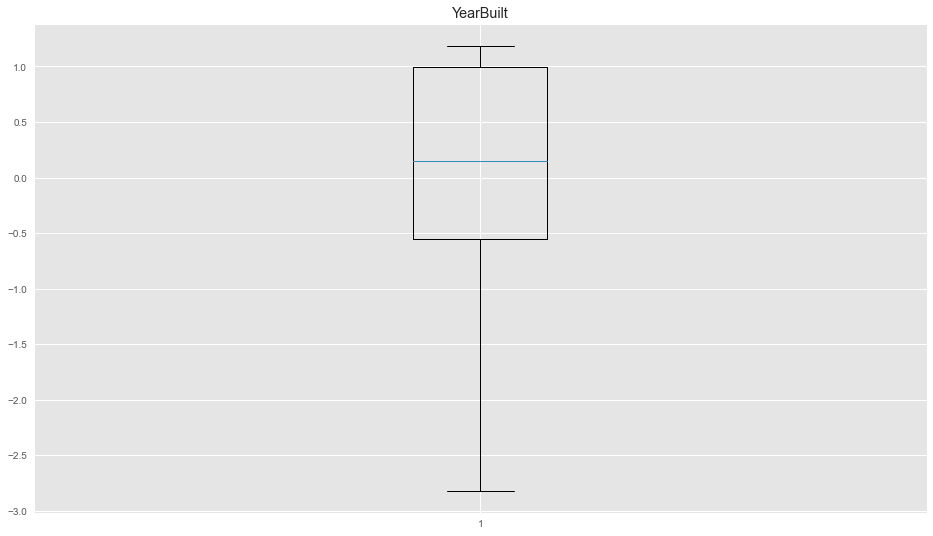

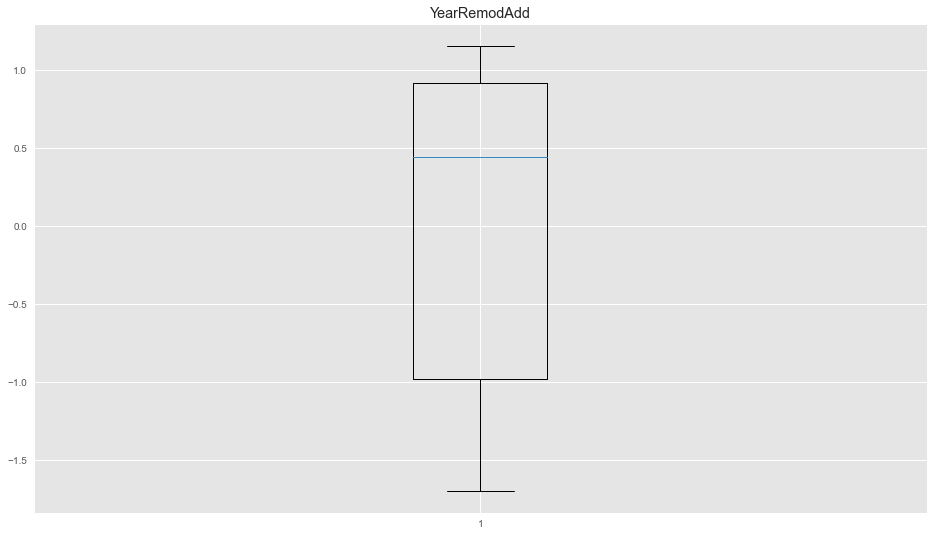

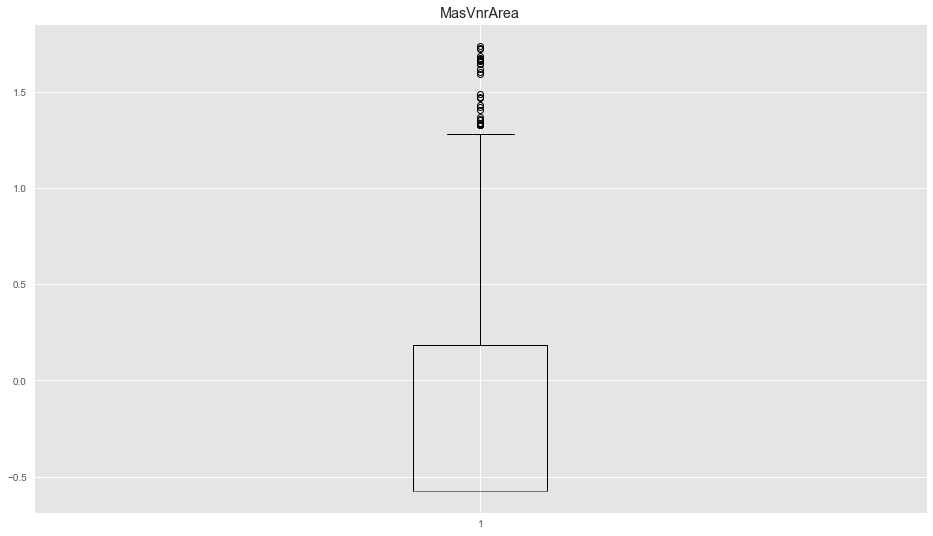

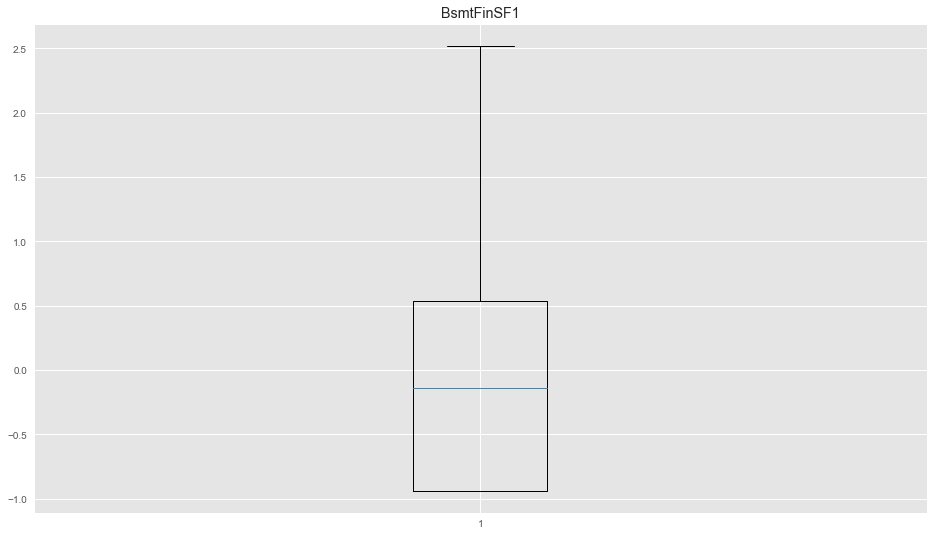

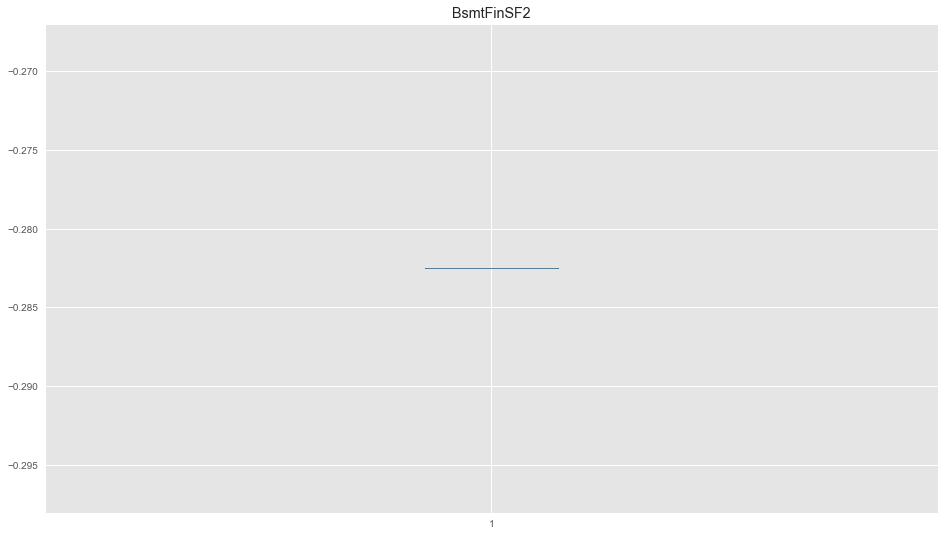

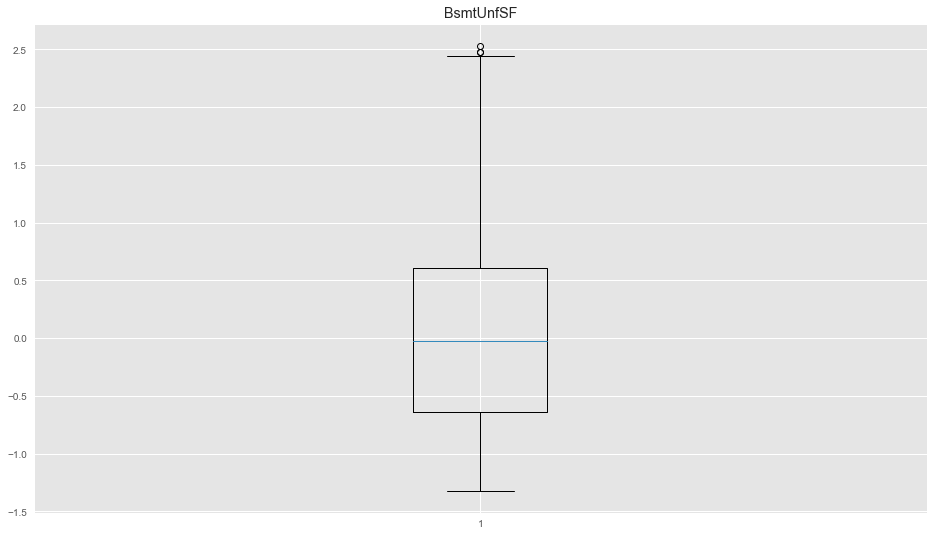

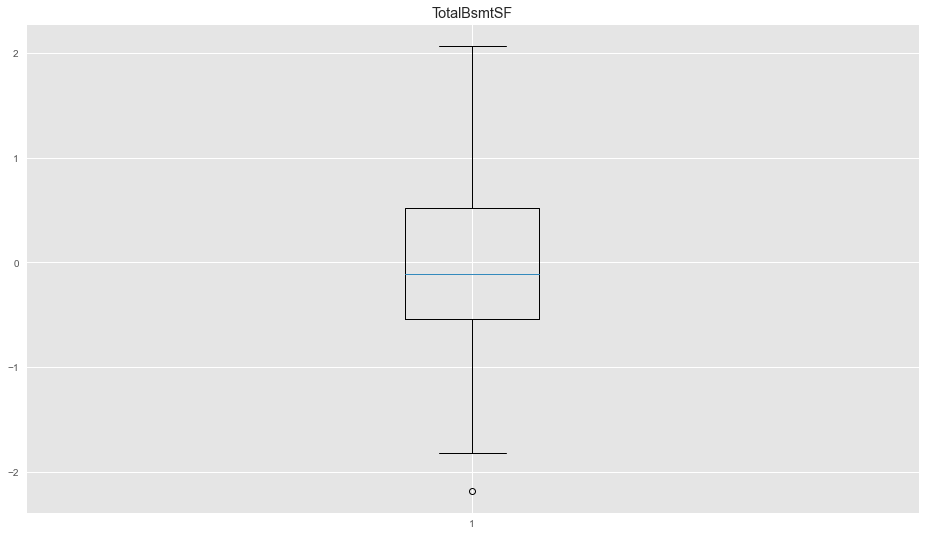

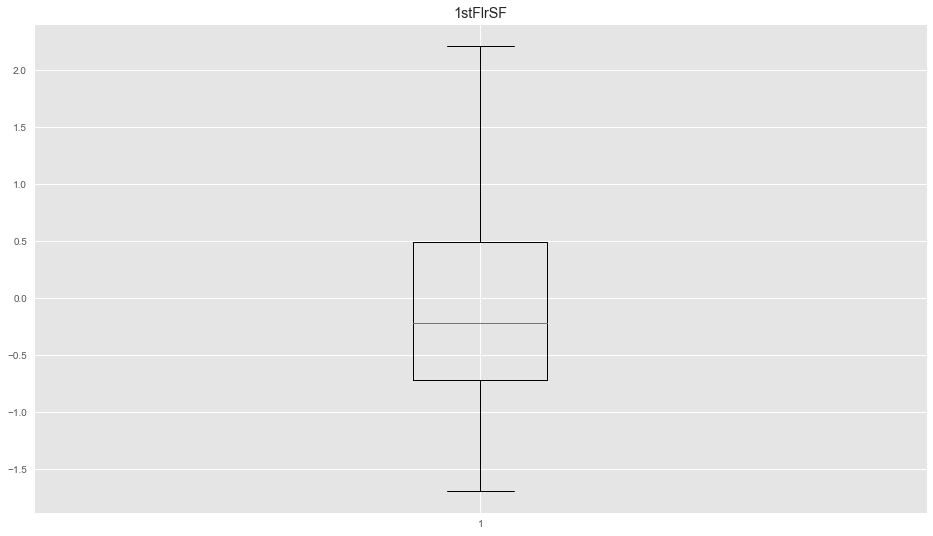

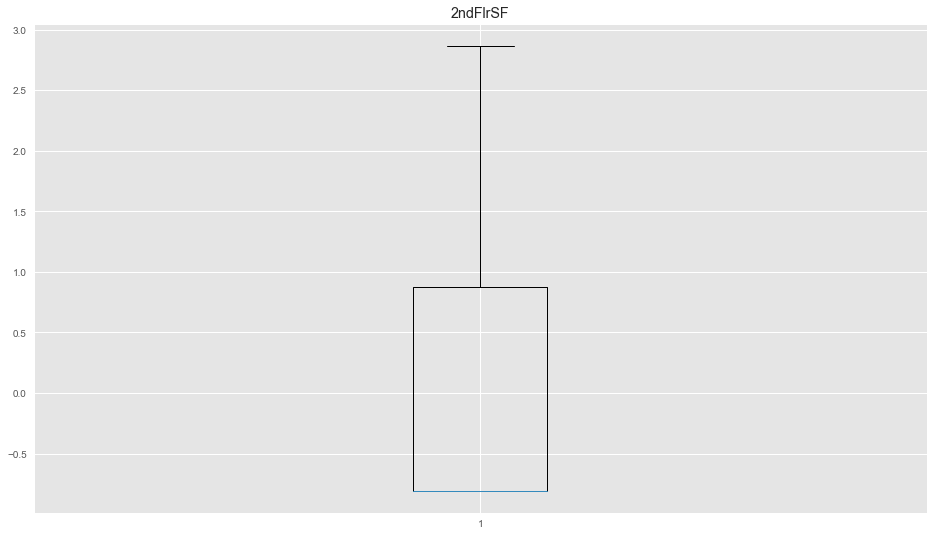

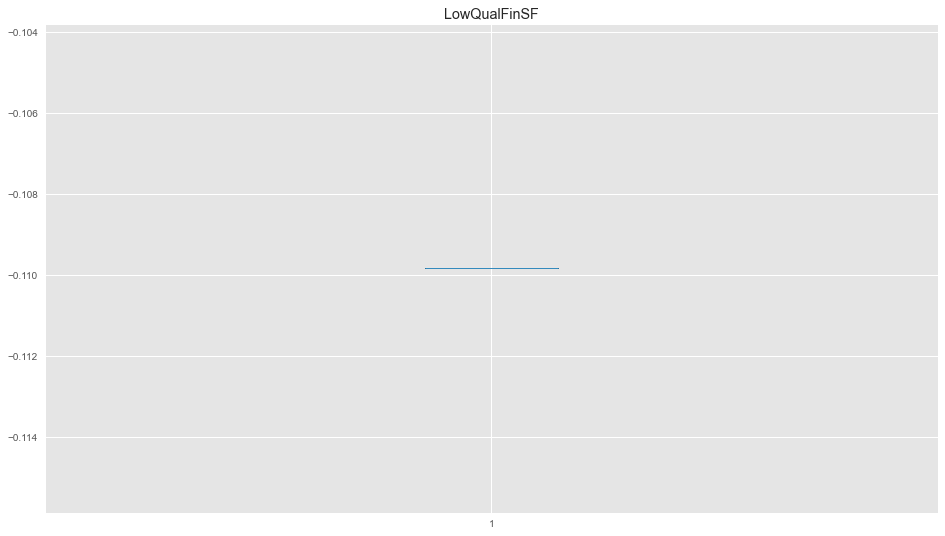

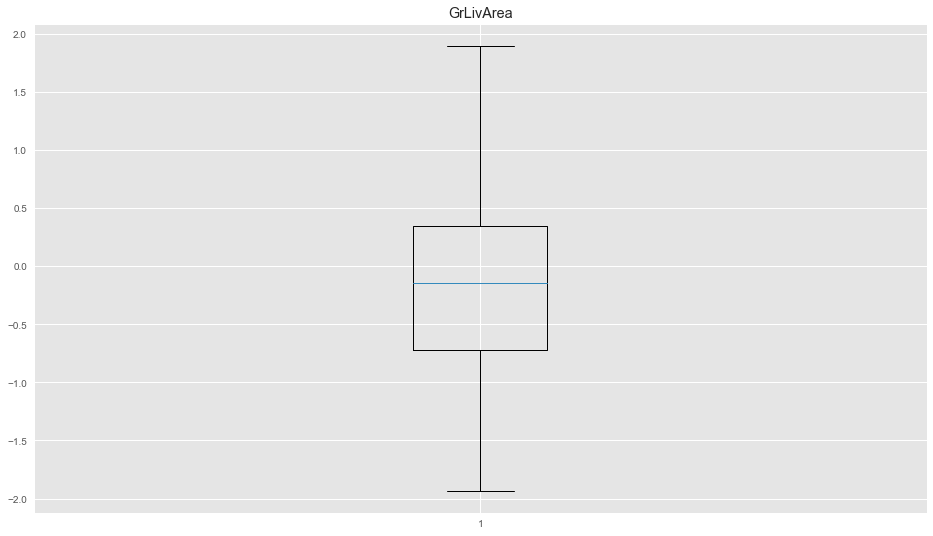

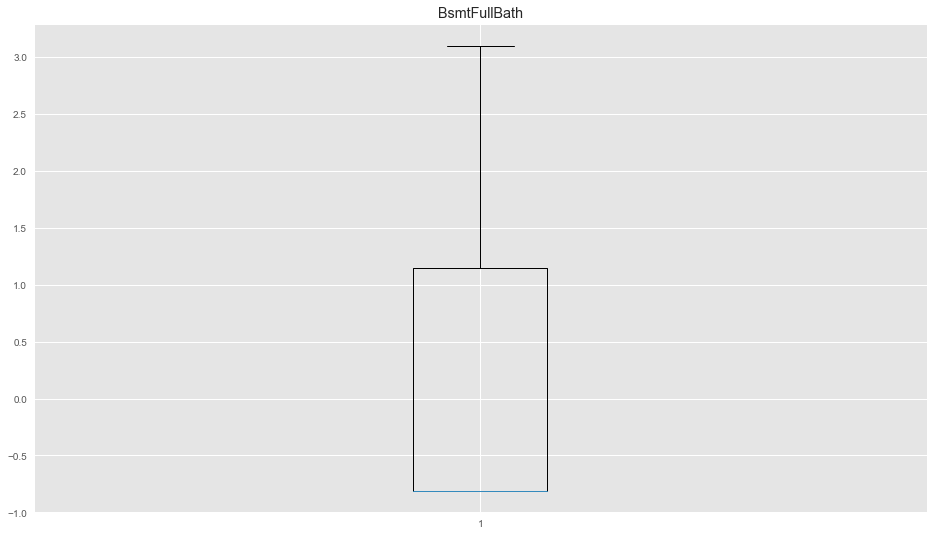

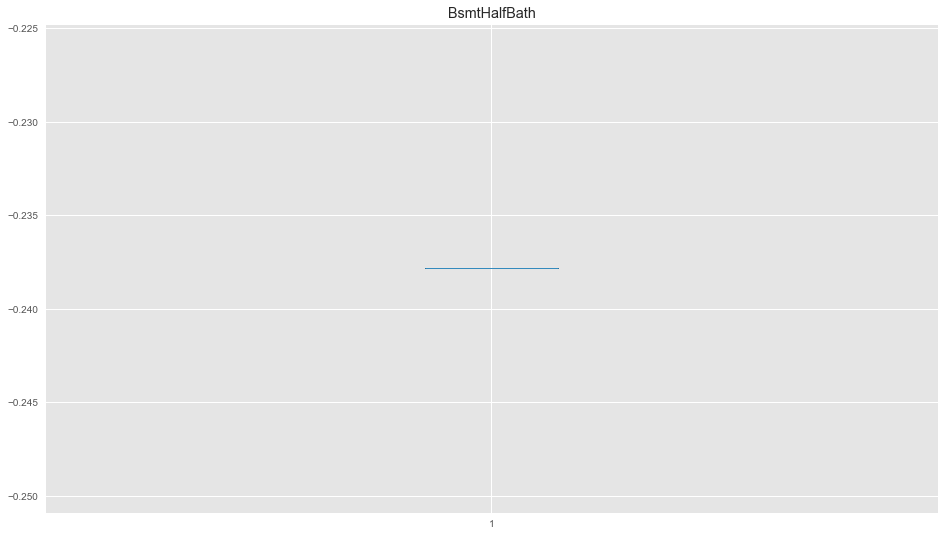

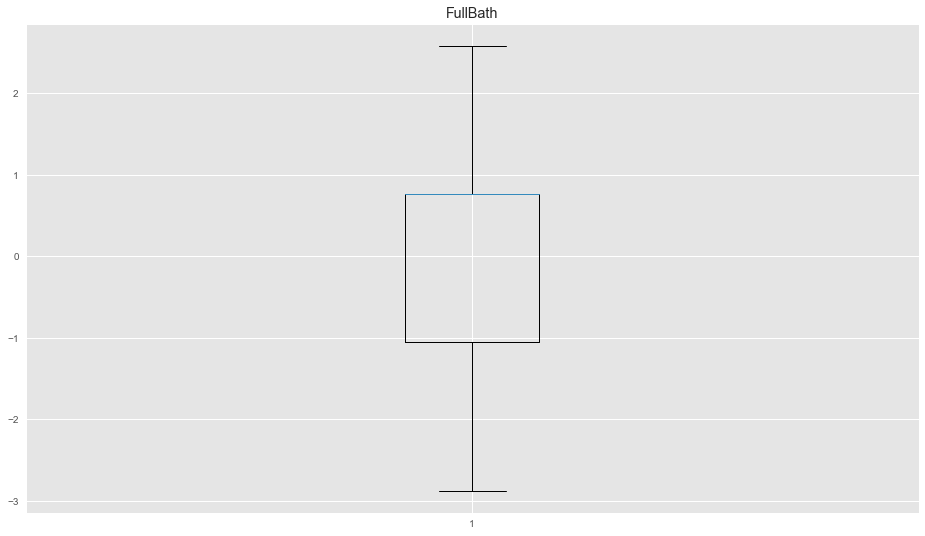

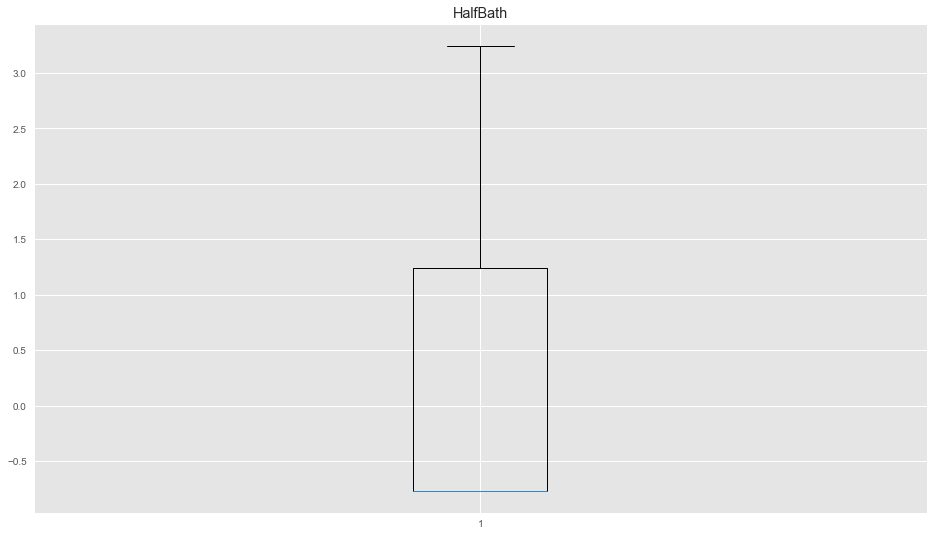

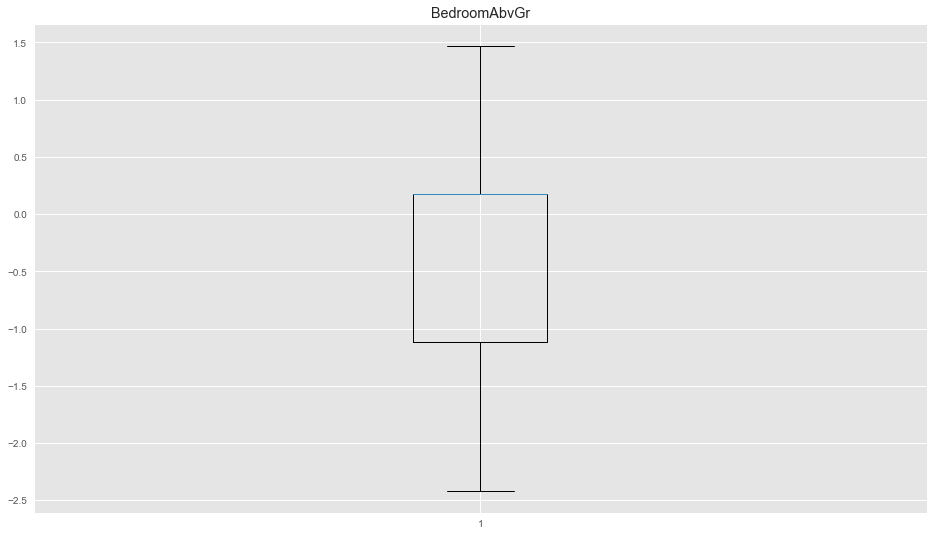

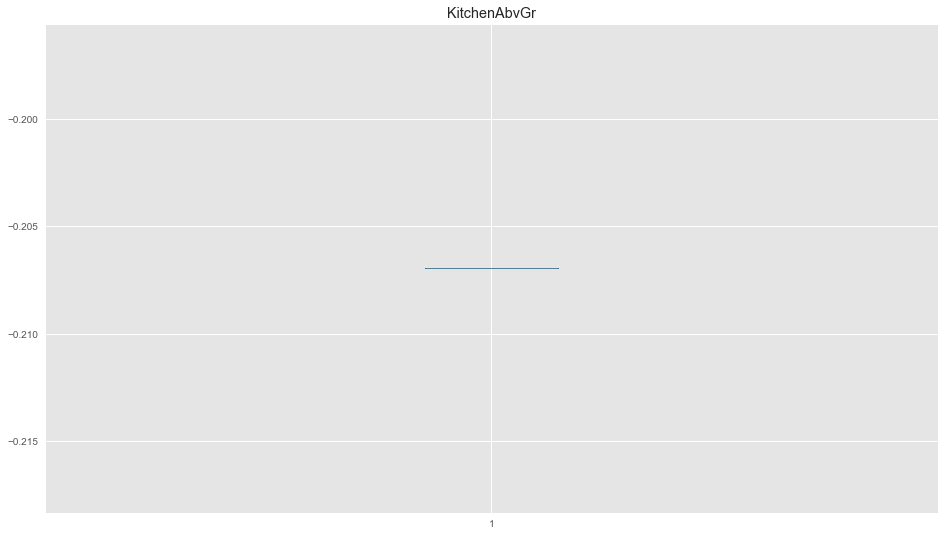

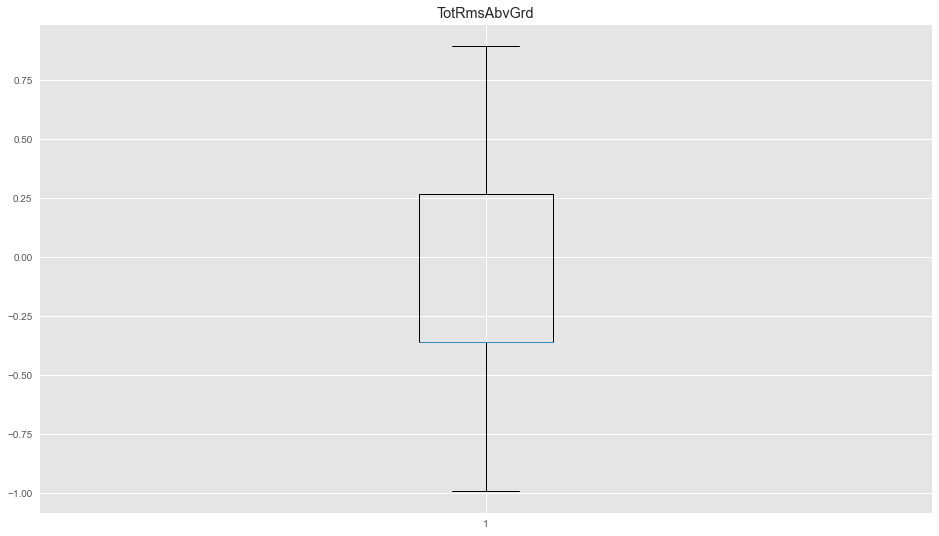

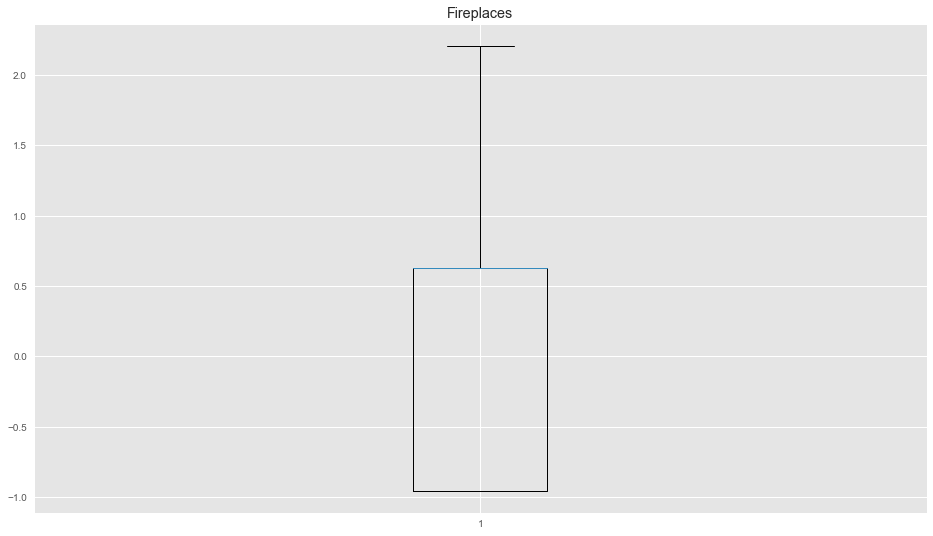

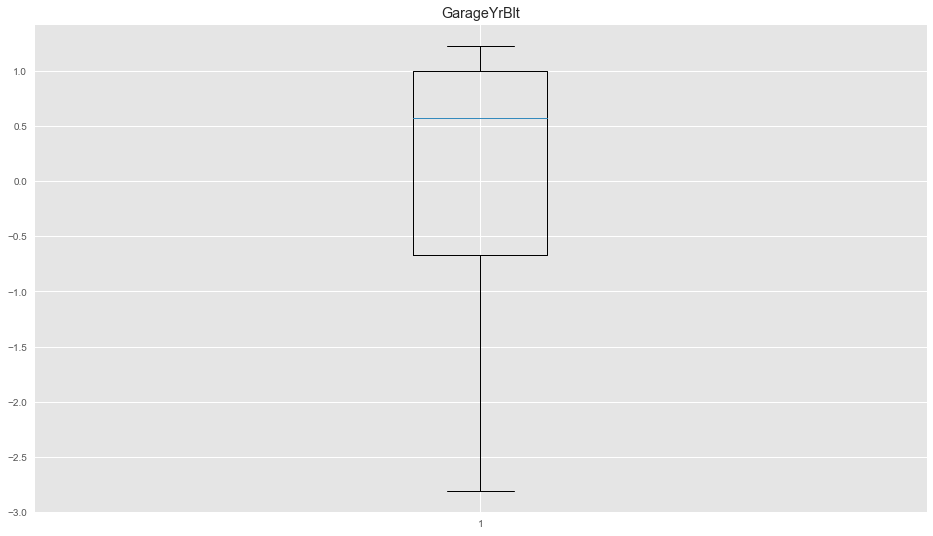

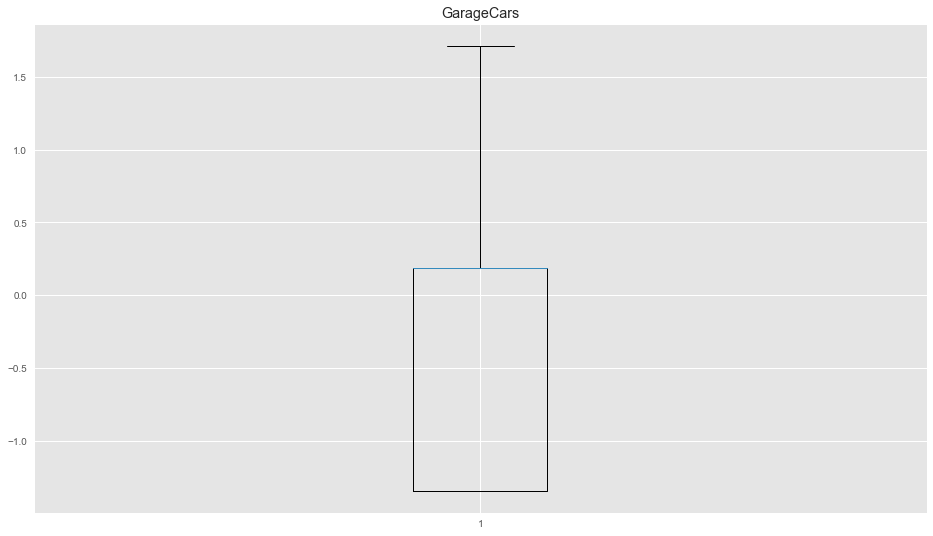

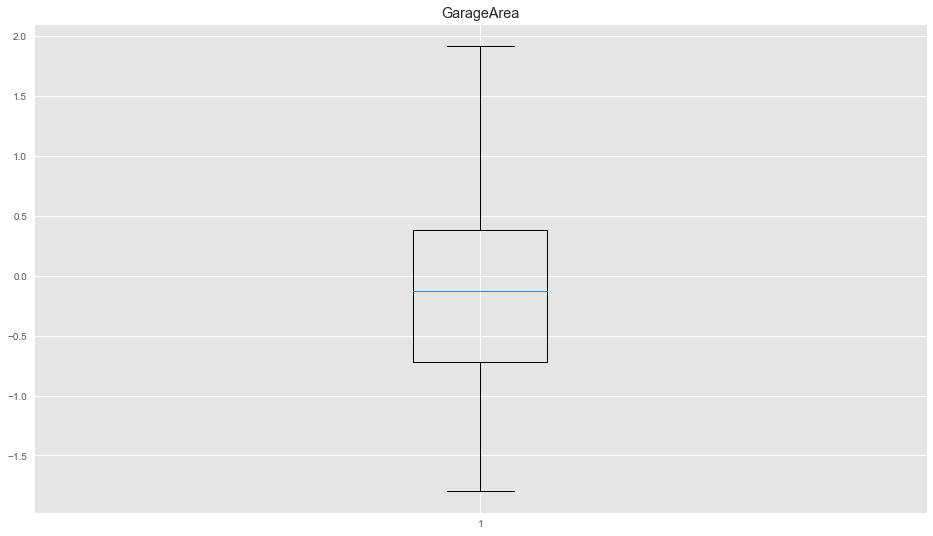

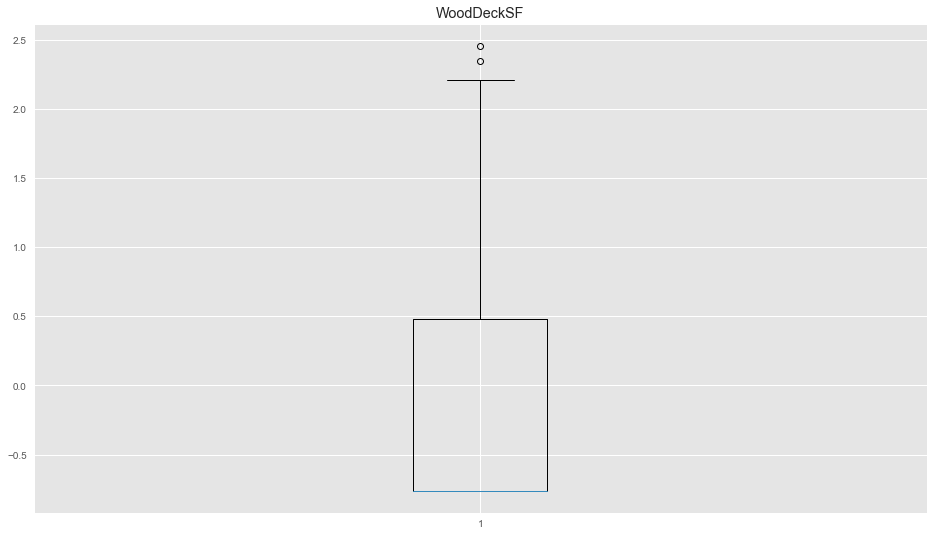

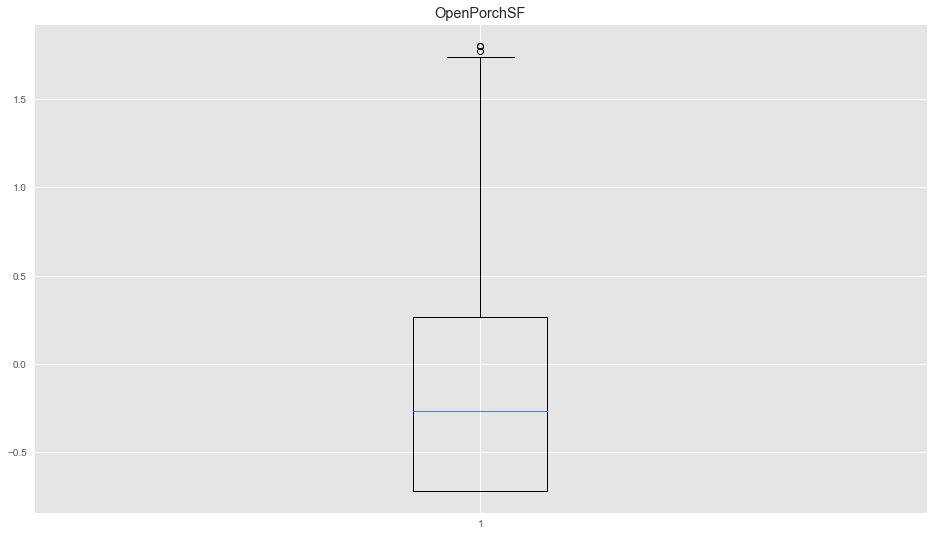

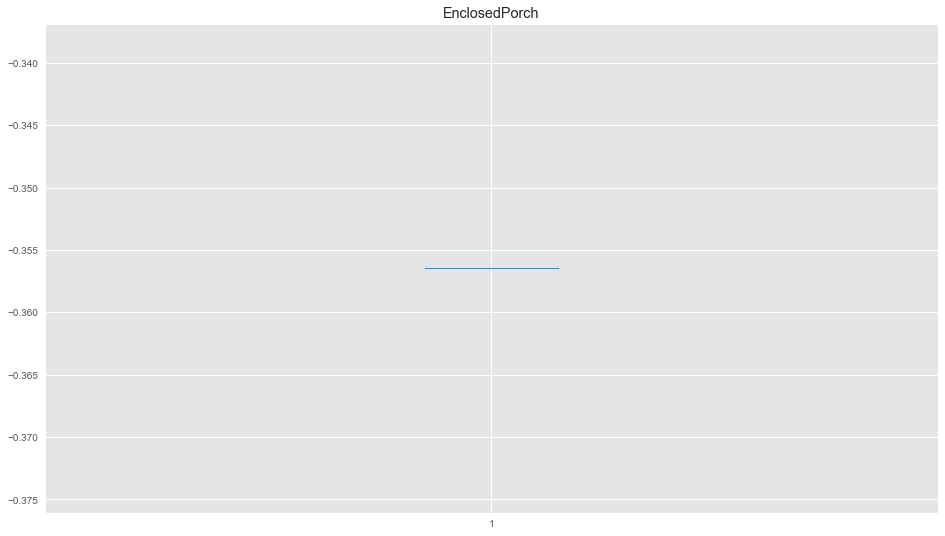

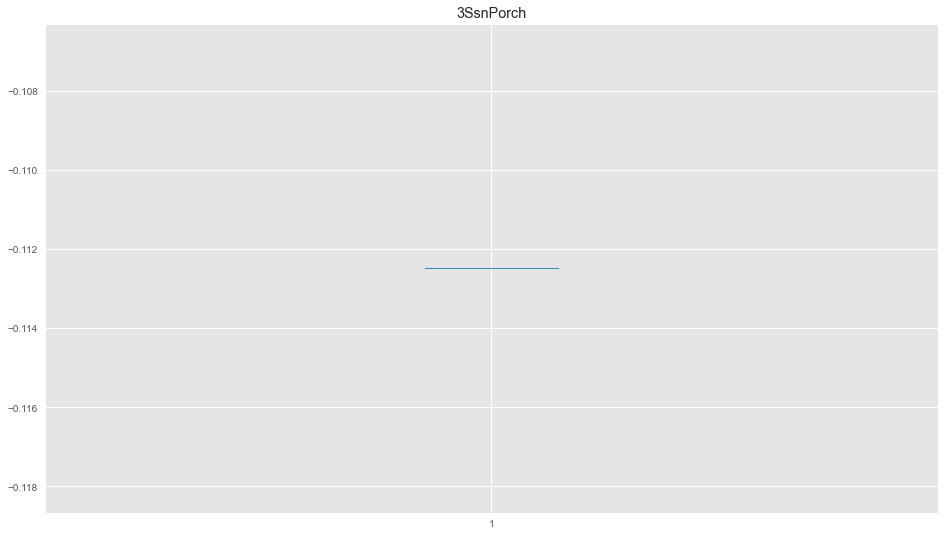

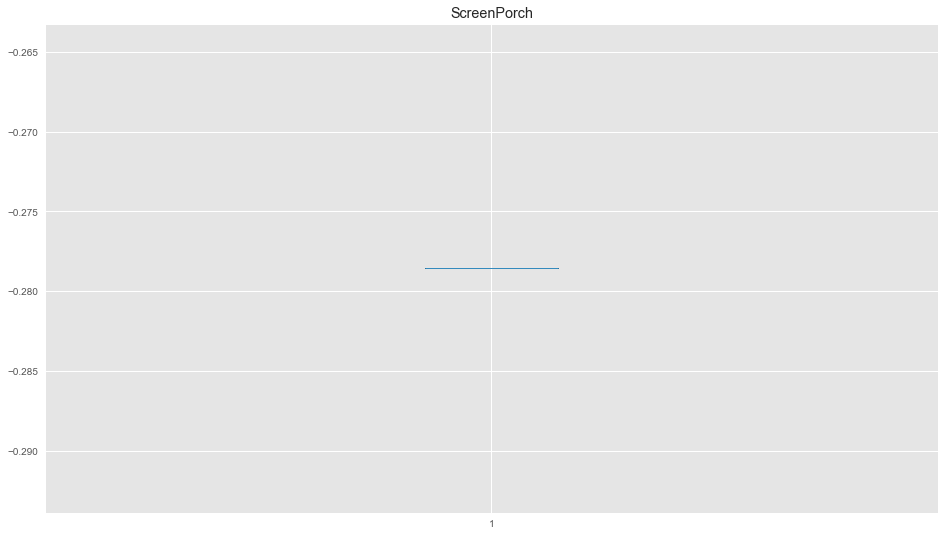

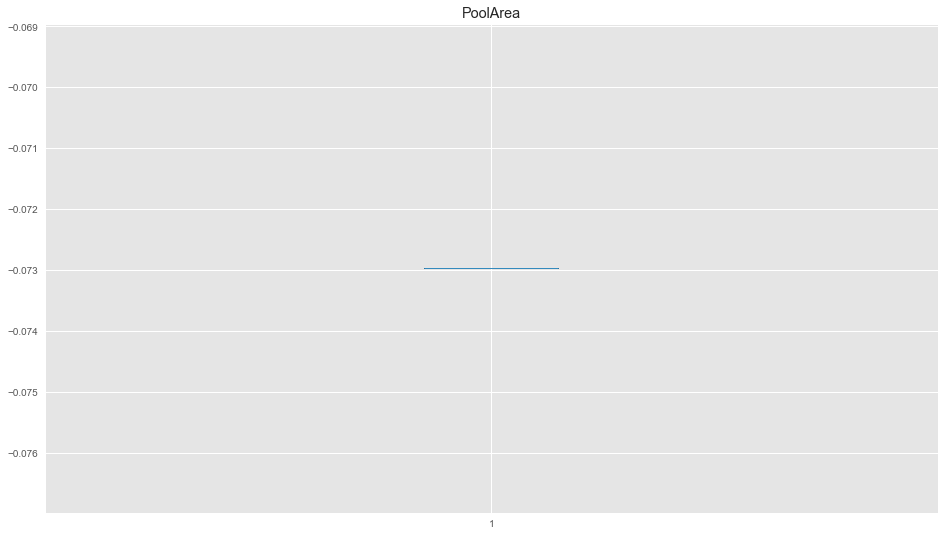

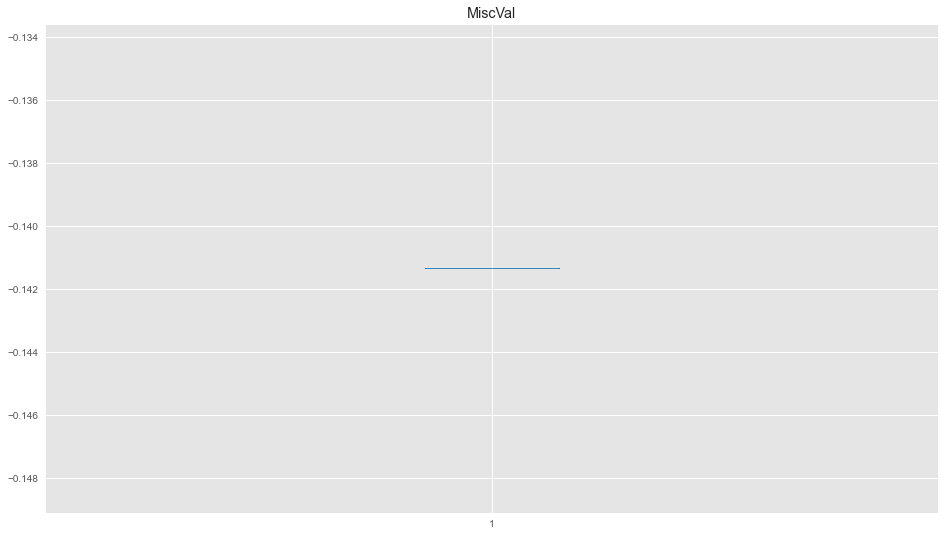

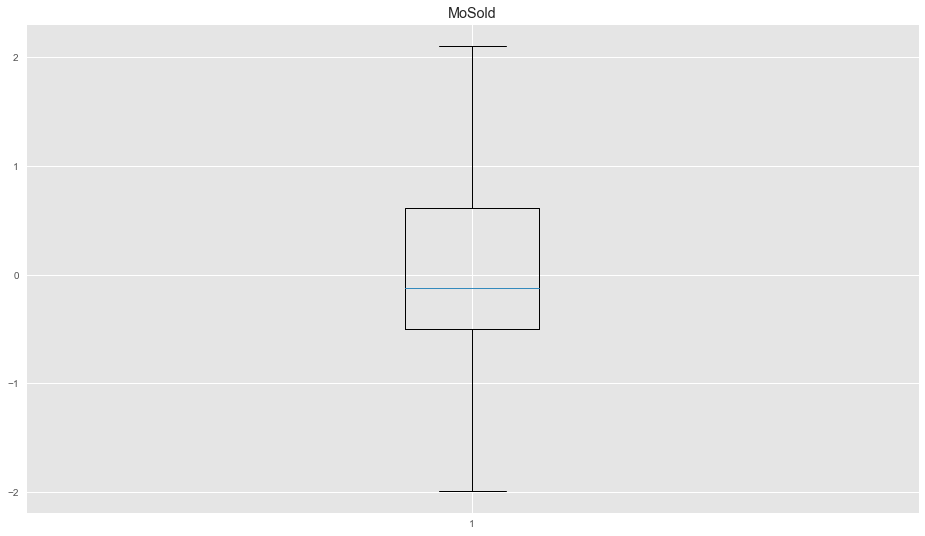

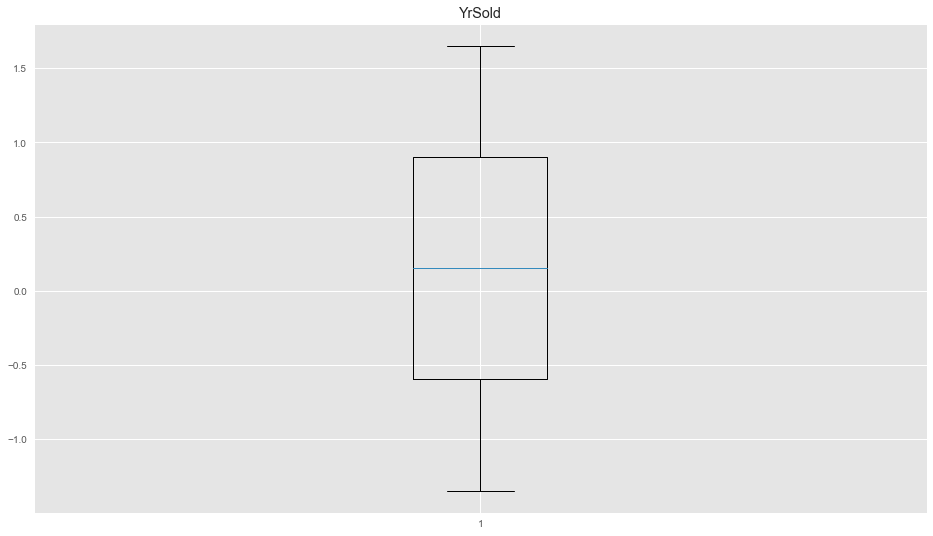

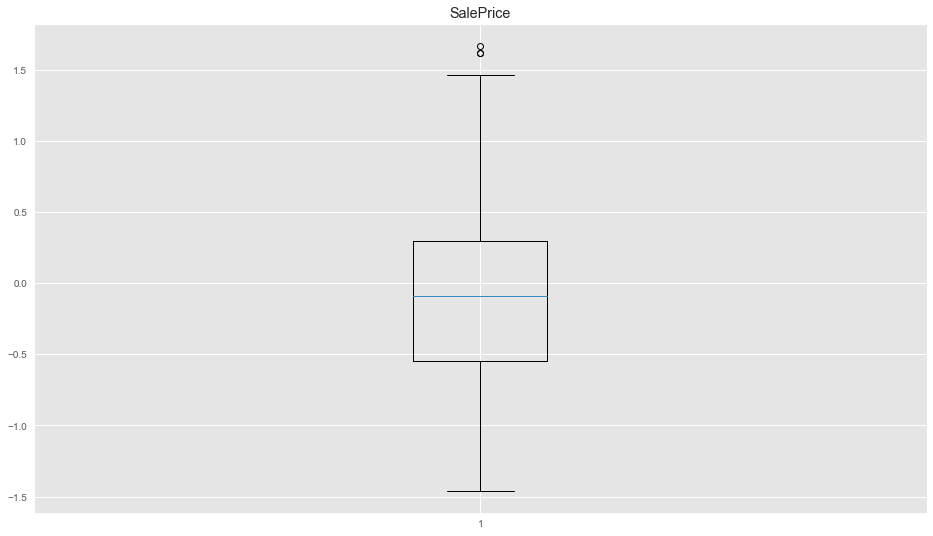

In [8]:
columns = []
for col in entrenamiento.columns:
    columns.append(col)
    
for columna in columns:
    Q1 = entrenamiento[columna].quantile(0.25)
    Q3 = entrenamiento[columna].quantile(0.75)
    IQR = Q3 - Q1

    indexes = entrenamiento[entrenamiento[columna] < (Q1 - 1.5 * IQR)].index
    entrenamiento.drop(indexes, inplace=True)

    indexes = entrenamiento[entrenamiento[columna] > (Q3 + 1.5 * IQR)].index
    entrenamiento.drop(indexes, inplace=True)
    
    plt.boxplot(entrenamiento[columna])
    plt.title(columna)
    plt.show()

### Muestra Representativa de los Datos

In [9]:
sample = entrenamiento.copy()

sample["combined"] = list(
    zip(
        sample["MSSubClass"],
        sample["LotFrontage"],
        sample["LotArea"],
        sample["OverallQual"],
        sample["OverallCond"],
        sample["YearBuilt"],
        sample["YearRemodAdd"],
        sample["MasVnrArea"],
        sample["BsmtFinSF1"],
        sample["BsmtFinSF2"],
        sample["BsmtUnfSF"],
        sample["TotalBsmtSF"],
        sample["1stFlrSF"],
        sample["2ndFlrSF"],
        sample["LowQualFinSF"],
        sample["GrLivArea"],
        sample["BsmtFullBath"],
        sample["BsmtHalfBath"],
        sample["FullBath"],
        sample["HalfBath"],
        sample["BedroomAbvGr"],
        sample["KitchenAbvGr"],
        sample["TotRmsAbvGrd"],
        sample["Fireplaces"],
        sample["GarageYrBlt"],
        sample["GarageCars"],
        sample["GarageArea"],
        sample["WoodDeckSF"],
        sample["OpenPorchSF"],
        sample["EnclosedPorch"],
        sample["3SsnPorch"],
        sample["ScreenPorch"],
        sample["PoolArea"],
        sample["MiscVal"],
        sample["MoSold"],
        sample["YrSold"],
        sample["SalePrice"]
    )
)

combined_weight = sample['combined'].value_counts(normalize=True)

sample['combined_weight'] = sample['combined'].apply(lambda x: combined_weight[x])

sample = sample.sample(65, weights=sample['combined_weight'])
sample = sample.drop(["combined_weight"], axis=1)

sample.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,...,65.000000,65.000000,6.500000e+01,6.500000e+01,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000
mean,-0.090051,-0.164996,-0.148529,0.102501,-0.136413,0.367022,0.197254,-0.145379,0.030975,-0.282519,...,0.072125,-0.013252,-3.564628e-01,-1.124793e-01,-0.278552,-0.072967,-0.141344,0.119673,-0.054411,-0.057122
std,0.876802,0.613141,0.309892,0.783252,0.680146,0.809802,0.975114,0.578542,0.845770,0.000000,...,0.774862,0.697341,5.594315e-17,1.398579e-17,0.000000,0.000000,0.000000,1.008809,1.021448,0.547461
min,-0.865309,-1.510931,-0.853819,-1.602169,-0.525264,-1.687723,-1.697107,-0.572493,-0.935981,-0.282519,...,-0.759918,-0.716419,-3.564628e-01,-1.124793e-01,-0.278552,-0.072967,-0.141344,-1.986668,-1.345064,-0.969963
25%,-0.865309,-0.439509,-0.336432,-0.877963,-0.525264,-0.363764,-0.698342,-0.572493,-0.901821,-0.282519,...,-0.759918,-0.716419,-3.564628e-01,-1.124793e-01,-0.278552,-0.072967,-0.141344,-0.498492,-0.596024,-0.494055
50%,-0.147137,-0.027423,-0.129649,-0.153757,-0.525264,0.734153,0.680905,-0.572493,-0.071308,-0.282519,...,0.224749,-0.203917,-3.564628e-01,-1.124793e-01,-0.278552,-0.072967,-0.141344,0.245595,-0.596024,-0.079593
75%,0.092254,0.302245,0.010338,0.570450,0.410858,1.057070,0.966266,0.192675,0.601216,-0.282519,...,0.651438,0.417297,-3.564628e-01,-1.124793e-01,-0.278552,-0.072967,-0.141344,0.617639,0.902055,0.289085
max,1.528599,1.002790,0.664269,1.294656,1.346981,1.186237,1.108947,1.617470,2.294267,-0.282519,...,1.800216,1.690786,-3.564628e-01,-1.124793e-01,-0.278552,-0.072967,-0.141344,2.105815,1.651095,1.296047


### Correlacion de variables

#### Original

<AxesSubplot:>

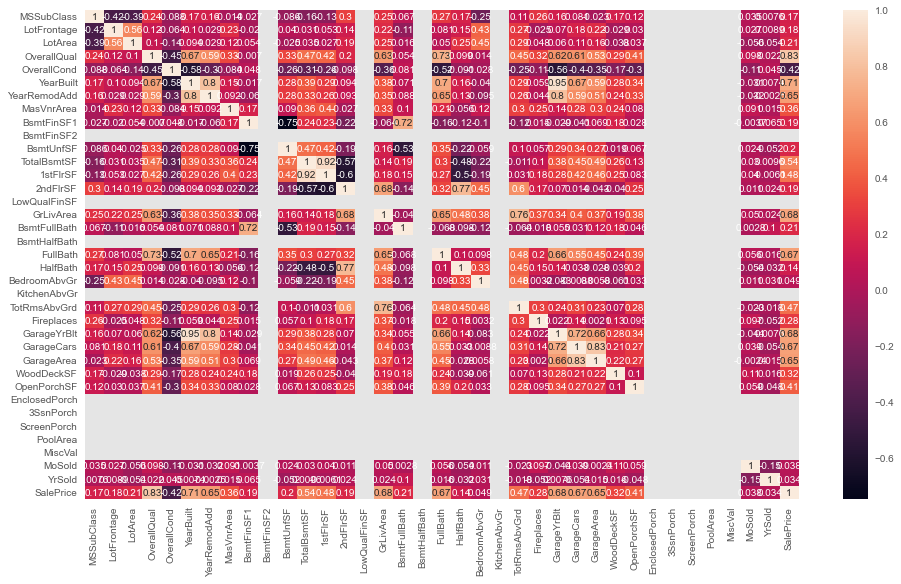

In [10]:
correlacion = entrenamiento.corr()
fig, axis = plt.subplots()
sb.heatmap(correlacion, xticklabels=correlacion.columns, yticklabels=correlacion.columns, annot=True, ax=axis)

#### Muestra

<AxesSubplot:>

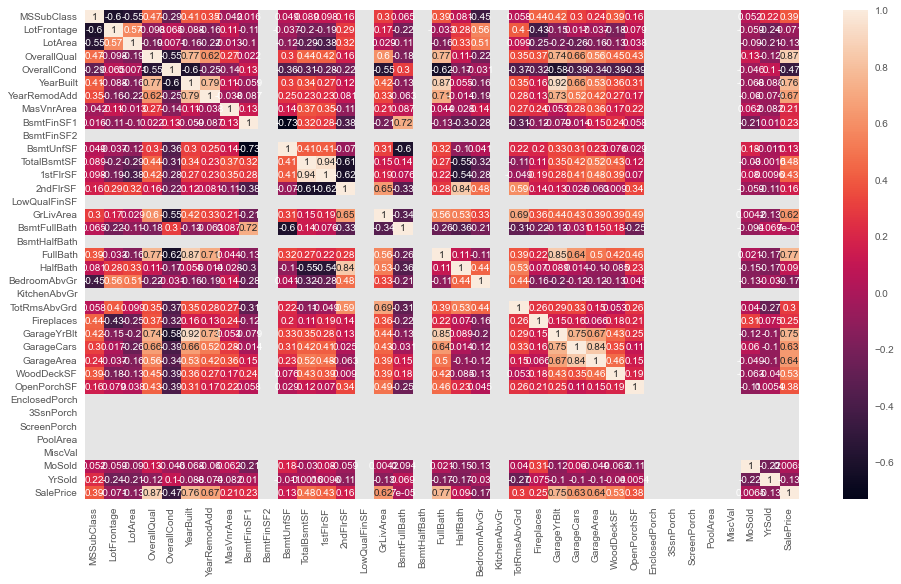

In [11]:
correlacion = sample.corr()
fig, axis = plt.subplots()
sb.heatmap(correlacion, xticklabels=correlacion.columns, yticklabels=correlacion.columns, annot=True, ax=axis)

In [12]:
kmeans = cluster.KMeans(n_clusters = 3)
X = np.array(entrenamiento[["SalePrice", "OverallQual", "YearBuilt", "YearRemodAdd", "TotalBsmtSF", "1stFlrSF", "GrLivArea", "FullBath", "GarageYrBlt", "GarageCars", "GarageArea"]])
X = sklearn.preprocessing.scale(X)
kmeans.fit(X)
entrenamiento['KmeansCluster'] = kmeans.labels_

In [13]:
entrenamiento['Quality-Price'] = entrenamiento['OverallQual'] / entrenamiento['SalePrice']
entrenamiento['Quality-Price'] = entrenamiento['Quality-Price'] / max(entrenamiento['Quality-Price'])
entrenamiento

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,KmeansCluster,Quality-Price
0,0.092254,-0.233466,-0.205793,0.570450,-0.525264,0.992487,0.823585,0.461803,0.571326,-0.282519,...,-0.356463,-0.112479,-0.278552,-0.072967,-0.141344,-1.614624,0.153015,0.277037,1,0.014954
2,0.092254,-0.109840,0.138640,0.570450,-0.525264,0.927903,0.776025,0.282384,0.101627,-0.282519,...,-0.356463,-0.112479,-0.278552,-0.072967,-0.141344,0.989683,0.153015,0.457762,1,0.009050
6,-0.865309,0.178619,-0.004792,1.294656,-0.525264,1.024778,0.918706,0.409032,1.986828,-0.282519,...,-0.356463,-0.112479,-0.278552,-0.072967,-0.141344,0.617639,-0.596024,1.463796,2,0.006423
10,-0.865309,-0.027423,0.132489,-0.877963,-0.525264,-0.234597,-0.983703,-0.572493,0.998325,-0.282519,...,-0.356463,-0.112479,-0.278552,-0.072967,-0.141344,-1.614624,0.153015,-0.674780,0,0.009449
13,-0.865309,0.837956,0.065079,0.570450,-0.525264,1.089362,1.013826,1.042275,-0.935981,-0.282519,...,-0.356463,-0.112479,-0.278552,-0.072967,-0.141344,0.617639,-0.596024,1.132467,2,0.003658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1447,0.092254,0.384662,-0.015125,1.294656,-0.525264,0.734153,0.490664,1.738841,1.367679,-0.282519,...,-0.356463,-0.112479,-0.278552,-0.072967,-0.141344,2.105815,-0.596024,0.656559,2,0.014320
1448,-0.147137,-0.027423,0.202237,-1.602169,1.346981,-2.010640,0.680905,-0.572493,-0.935981,-0.282519,...,-0.356463,-0.112479,-0.278552,-0.072967,-0.141344,-0.498492,-0.596024,-0.885625,0,0.013138
1451,-0.865309,0.302245,-0.105908,1.294656,-0.525264,1.153945,1.108947,0.451249,-0.935981,-0.282519,...,-0.356463,-0.112479,-0.278552,-0.072967,-0.141344,-0.498492,0.902055,1.223914,2,0.007682
1454,-0.865309,-0.357092,-0.322655,0.570450,-0.525264,1.024778,0.918706,-0.572493,-0.060633,-0.282519,...,-0.356463,-0.112479,-0.278552,-0.072967,-0.141344,1.361727,0.902055,-0.006098,2,-0.679336


## Modelo de regresion Logística

### Variable  Dicotómica  

In [14]:
entrenamiento["CARA"] = np.where(entrenamiento["KmeansCluster"] == 2, 1, 0)
entrenamiento["MEDIA"] = np.where(entrenamiento["KmeansCluster"] == 1, 1, 0)
entrenamiento["ECONOMICA"] = np.where(entrenamiento["KmeansCluster"] == 0, 1, 0)
entrenamiento

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,PoolArea,MiscVal,MoSold,YrSold,SalePrice,KmeansCluster,Quality-Price,CARA,MEDIA,ECONOMICA
0,0.092254,-0.233466,-0.205793,0.570450,-0.525264,0.992487,0.823585,0.461803,0.571326,-0.282519,...,-0.072967,-0.141344,-1.614624,0.153015,0.277037,1,0.014954,0,1,0
2,0.092254,-0.109840,0.138640,0.570450,-0.525264,0.927903,0.776025,0.282384,0.101627,-0.282519,...,-0.072967,-0.141344,0.989683,0.153015,0.457762,1,0.009050,0,1,0
6,-0.865309,0.178619,-0.004792,1.294656,-0.525264,1.024778,0.918706,0.409032,1.986828,-0.282519,...,-0.072967,-0.141344,0.617639,-0.596024,1.463796,2,0.006423,1,0,0
10,-0.865309,-0.027423,0.132489,-0.877963,-0.525264,-0.234597,-0.983703,-0.572493,0.998325,-0.282519,...,-0.072967,-0.141344,-1.614624,0.153015,-0.674780,0,0.009449,0,0,1
13,-0.865309,0.837956,0.065079,0.570450,-0.525264,1.089362,1.013826,1.042275,-0.935981,-0.282519,...,-0.072967,-0.141344,0.617639,-0.596024,1.132467,2,0.003658,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1447,0.092254,0.384662,-0.015125,1.294656,-0.525264,0.734153,0.490664,1.738841,1.367679,-0.282519,...,-0.072967,-0.141344,2.105815,-0.596024,0.656559,2,0.014320,1,0,0
1448,-0.147137,-0.027423,0.202237,-1.602169,1.346981,-2.010640,0.680905,-0.572493,-0.935981,-0.282519,...,-0.072967,-0.141344,-0.498492,-0.596024,-0.885625,0,0.013138,0,0,1
1451,-0.865309,0.302245,-0.105908,1.294656,-0.525264,1.153945,1.108947,0.451249,-0.935981,-0.282519,...,-0.072967,-0.141344,-0.498492,0.902055,1.223914,2,0.007682,1,0,0
1454,-0.865309,-0.357092,-0.322655,0.570450,-0.525264,1.024778,0.918706,-0.572493,-0.060633,-0.282519,...,-0.072967,-0.141344,1.361727,0.902055,-0.006098,2,-0.679336,1,0,0


## CASA PERTENECE A CARA

### Variables independientes y variable dependiente

In [15]:
X = entrenamiento[["OverallQual", "YearBuilt", "YearRemodAdd", "TotalBsmtSF", "1stFlrSF", "GrLivArea", "FullBath", 
                   "GarageYrBlt", "GarageCars", "GarageArea"]]
y = entrenamiento.pop("CARA")

### Test y entrenamiento inicial

In [16]:
X_train, X_test,y_train, y_test = train_test_split(X, y,test_size=0.3,train_size=0.7)

In [17]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 261 entries, 1316 to 448
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   261 non-null    float64
 1   YearBuilt     261 non-null    float64
 2   YearRemodAdd  261 non-null    float64
 3   TotalBsmtSF   261 non-null    float64
 4   1stFlrSF      261 non-null    float64
 5   GrLivArea     261 non-null    float64
 6   FullBath      261 non-null    float64
 7   GarageYrBlt   261 non-null    float64
 8   GarageCars    261 non-null    float64
 9   GarageArea    261 non-null    float64
dtypes: float64(10)
memory usage: 22.4 KB


In [18]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113 entries, 965 to 1231
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   113 non-null    float64
 1   YearBuilt     113 non-null    float64
 2   YearRemodAdd  113 non-null    float64
 3   TotalBsmtSF   113 non-null    float64
 4   1stFlrSF      113 non-null    float64
 5   GrLivArea     113 non-null    float64
 6   FullBath      113 non-null    float64
 7   GarageYrBlt   113 non-null    float64
 8   GarageCars    113 non-null    float64
 9   GarageArea    113 non-null    float64
dtypes: float64(10)
memory usage: 9.7 KB


In [19]:
logReg = LogisticRegression(penalty='none')
logReg.fit(X_train,y_train)

LogisticRegression(penalty='none')

In [20]:
y_pred = logReg.predict(X_test)
y_proba = logReg.predict_proba(X)[:,1]
cm = Confusion_Matrix(y_test,y_pred)
cm

array([[75,  1],
       [ 0, 37]], dtype=int64)

In [21]:
accuracy=accuracy_score(y_test,y_pred)
precision =precision_score(y_test, y_pred,average='micro')
recall =  recall_score(y_test, y_pred,average='micro')
f1 = f1_score(y_test,y_pred,average='micro')
print('Accuracy: ',accuracy)
print('Precision: ',precision)
print('Recall: ',recall)
print('F1 score: ',f1)
print('Score: ', logReg.score(X_test,y_test))

Accuracy:  0.9911504424778761
Precision:  0.9911504424778761
Recall:  0.9911504424778761
F1 score:  0.9911504424778761
Score:  0.9911504424778761


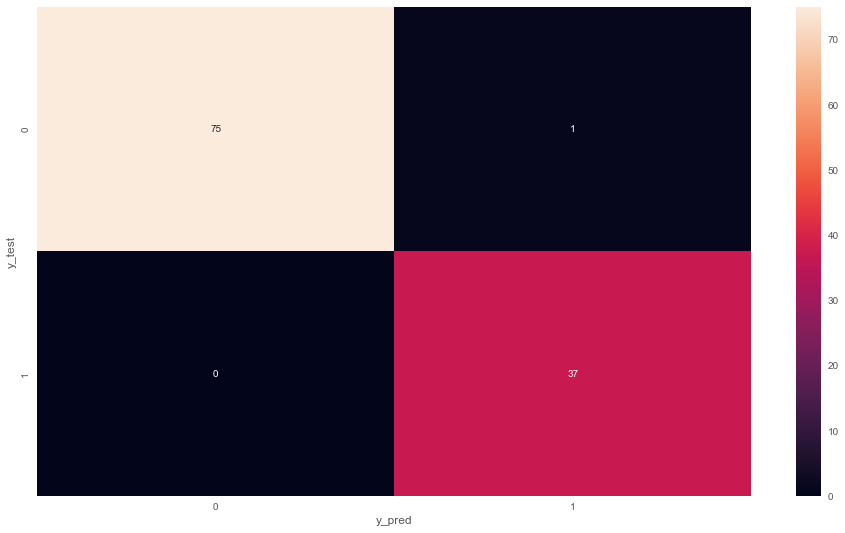

In [22]:
dat = {
    'y_test': y_test,
    'y_pred': y_pred
}

ev = pd.DataFrame(dat, columns=['y_test','y_pred'])

confusion_matrix = pd.crosstab(ev['y_test'], ev['y_pred'], rownames=['y_test'], colnames=['y_pred'])

sb.heatmap(confusion_matrix, annot=True)
plt.show()

#### Correlacion de variables para descartar variables independientes con alta correlacion

<AxesSubplot:>

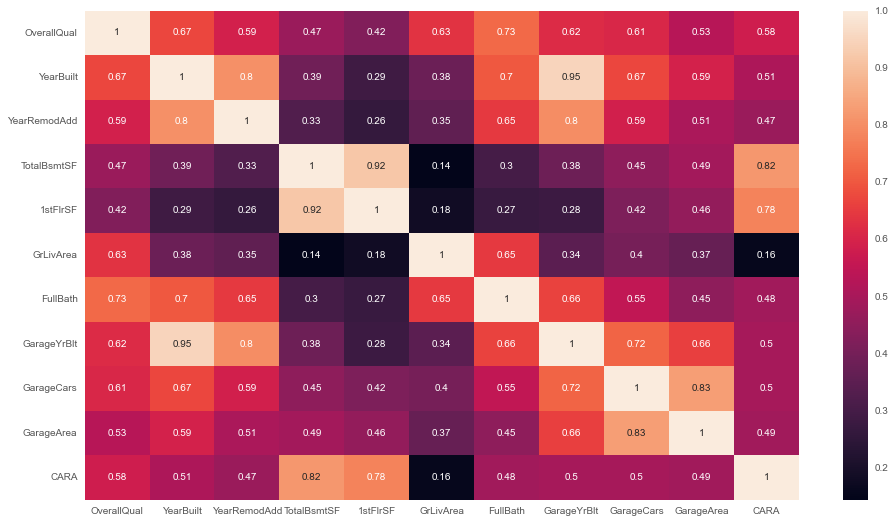

In [23]:
entrenamiento['KmeansCluster'] = kmeans.labels_
entrenamiento["CARA"] = np.where(entrenamiento["KmeansCluster"] == 2, 1, 0)

Cor_DI = entrenamiento[["OverallQual", "YearBuilt", "YearRemodAdd", "TotalBsmtSF", "1stFlrSF", "GrLivArea", "FullBath", 
                   "GarageYrBlt", "GarageCars", "GarageArea", "CARA"]]
correlacion = Cor_DI.corr()
fig, axis = plt.subplots()
sb.heatmap(correlacion, xticklabels=correlacion.columns, yticklabels=correlacion.columns, annot=True, ax=axis)

#### 4) Analice el modelo. Determine si hay multicolinealidad en las variables, y cuáles son las que aportan  al  modelo,  por  su  valor  de  significación.  Haga  un  análisis  de  correlación  de  las variables del modelo y especifique si el modelo se adapta bien a los datos. Explique si hay sobreajuste (overfitting) o no.

# Respuesta

#### 5. Utilice  el  modelo  con  el  conjunto  de  prueba  y  determine  la  eficiencia  del  algoritmo  para clasificar o predecir, en dependencia de las características de la variable respuesta.

## CASA PERTENECE A MEDIA

### Variables independientes y variable dependiente

In [24]:
X = entrenamiento[["OverallQual", "YearBuilt", "YearRemodAdd", "TotalBsmtSF", "1stFlrSF", "GrLivArea", "FullBath", 
                   "GarageYrBlt", "GarageCars", "GarageArea"]]
y = entrenamiento.pop("MEDIA")

### Test y entrenamiento inicial

In [25]:
X_train, X_test,y_train, y_test = train_test_split(X, y,test_size=0.3,train_size=0.7)

In [26]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 261 entries, 958 to 1042
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   261 non-null    float64
 1   YearBuilt     261 non-null    float64
 2   YearRemodAdd  261 non-null    float64
 3   TotalBsmtSF   261 non-null    float64
 4   1stFlrSF      261 non-null    float64
 5   GrLivArea     261 non-null    float64
 6   FullBath      261 non-null    float64
 7   GarageYrBlt   261 non-null    float64
 8   GarageCars    261 non-null    float64
 9   GarageArea    261 non-null    float64
dtypes: float64(10)
memory usage: 22.4 KB


In [27]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113 entries, 1288 to 401
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   113 non-null    float64
 1   YearBuilt     113 non-null    float64
 2   YearRemodAdd  113 non-null    float64
 3   TotalBsmtSF   113 non-null    float64
 4   1stFlrSF      113 non-null    float64
 5   GrLivArea     113 non-null    float64
 6   FullBath      113 non-null    float64
 7   GarageYrBlt   113 non-null    float64
 8   GarageCars    113 non-null    float64
 9   GarageArea    113 non-null    float64
dtypes: float64(10)
memory usage: 9.7 KB


In [28]:
logReg = LogisticRegression(penalty='none')
logReg.fit(X_train,y_train)

LogisticRegression(penalty='none')

In [29]:
y_pred = logReg.predict(X_test)
y_proba = logReg.predict_proba(X)[:,1]
cm = Confusion_Matrix(y_test,y_pred)
cm

array([[74,  3],
       [ 4, 32]], dtype=int64)

In [30]:
accuracy=accuracy_score(y_test,y_pred)
precision =precision_score(y_test, y_pred,average='micro')
recall =  recall_score(y_test, y_pred,average='micro')
f1 = f1_score(y_test,y_pred,average='micro')
print('Accuracy: ',accuracy)
print('Precision: ',precision)
print('Recall: ',recall)
print('F1 score: ',f1)
print('Score: ', logReg.score(X_test,y_test))

Accuracy:  0.9380530973451328
Precision:  0.9380530973451328
Recall:  0.9380530973451328
F1 score:  0.9380530973451328
Score:  0.9380530973451328


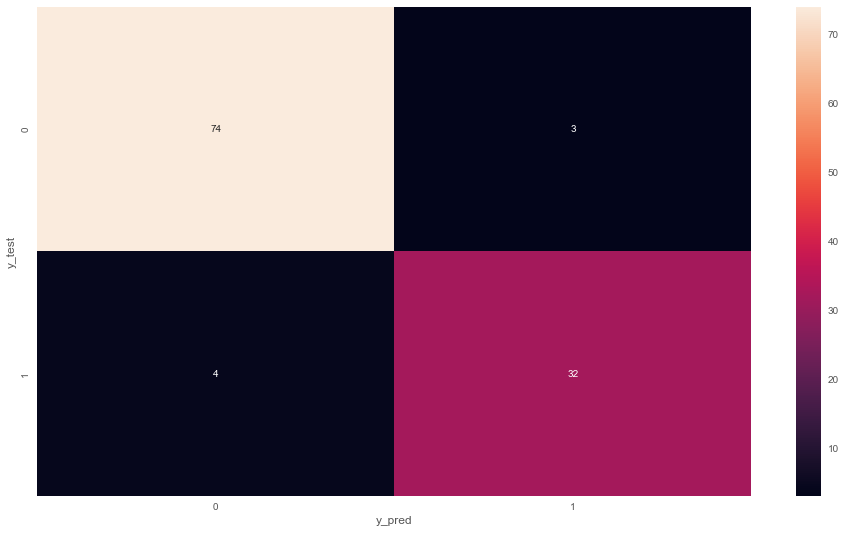

In [31]:
dat = {
    'y_test': y_test,
    'y_pred': y_pred
}

ev = pd.DataFrame(dat, columns=['y_test','y_pred'])

confusion_matrix = pd.crosstab(ev['y_test'], ev['y_pred'], rownames=['y_test'], colnames=['y_pred'])

sb.heatmap(confusion_matrix, annot=True)
plt.show()

<AxesSubplot:>

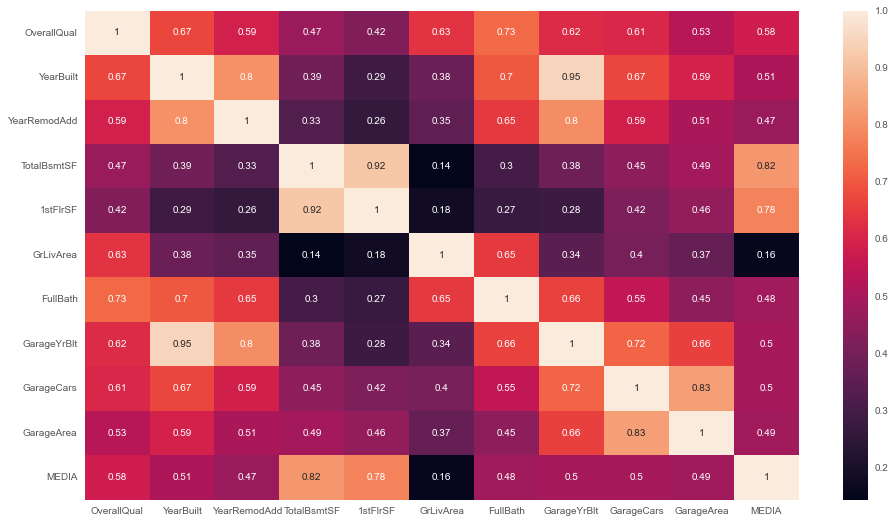

In [32]:
entrenamiento['KmeansCluster'] = kmeans.labels_
entrenamiento["MEDIA"] = np.where(entrenamiento["KmeansCluster"] == 2, 1, 0)

Cor_DI = entrenamiento[["OverallQual", "YearBuilt", "YearRemodAdd", "TotalBsmtSF", "1stFlrSF", "GrLivArea", "FullBath", 
                   "GarageYrBlt", "GarageCars", "GarageArea", "MEDIA"]]
correlacion = Cor_DI.corr()
fig, axis = plt.subplots()
sb.heatmap(correlacion, xticklabels=correlacion.columns, yticklabels=correlacion.columns, annot=True, ax=axis)

#### 4) Analice el modelo. Determine si hay multicolinealidad en las variables, y cuáles son las que aportan  al  modelo,  por  su  valor  de  significación.  Haga  un  análisis  de  correlación  de  las variables del modelo y especifique si el modelo se adapta bien a los datos. Explique si hay sobreajuste (overfitting) o no.

# Respuesta

#### 5. Utilice  el  modelo  con  el  conjunto  de  prueba  y  determine  la  eficiencia  del  algoritmo  para clasificar o predecir, en dependencia de las características de la variable respuesta.

## CASA PERTENECE A ECONOMICA

### Variables independientes y variable dependiente

In [34]:
X = entrenamiento[["OverallQual", "YearBuilt", "YearRemodAdd", "TotalBsmtSF", "1stFlrSF", "GrLivArea", "FullBath", 
                   "GarageYrBlt", "GarageCars", "GarageArea"]]
y = entrenamiento.pop("ECONOMICA")

### Test y entrenamiento inicial

In [35]:
X_train, X_test,y_train, y_test = train_test_split(X, y,test_size=0.3,train_size=0.7)

In [36]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 261 entries, 761 to 469
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   261 non-null    float64
 1   YearBuilt     261 non-null    float64
 2   YearRemodAdd  261 non-null    float64
 3   TotalBsmtSF   261 non-null    float64
 4   1stFlrSF      261 non-null    float64
 5   GrLivArea     261 non-null    float64
 6   FullBath      261 non-null    float64
 7   GarageYrBlt   261 non-null    float64
 8   GarageCars    261 non-null    float64
 9   GarageArea    261 non-null    float64
dtypes: float64(10)
memory usage: 22.4 KB


In [37]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113 entries, 130 to 334
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   113 non-null    float64
 1   YearBuilt     113 non-null    float64
 2   YearRemodAdd  113 non-null    float64
 3   TotalBsmtSF   113 non-null    float64
 4   1stFlrSF      113 non-null    float64
 5   GrLivArea     113 non-null    float64
 6   FullBath      113 non-null    float64
 7   GarageYrBlt   113 non-null    float64
 8   GarageCars    113 non-null    float64
 9   GarageArea    113 non-null    float64
dtypes: float64(10)
memory usage: 9.7 KB


In [38]:
logReg = LogisticRegression(penalty='none')
logReg.fit(X_train,y_train)

LogisticRegression(penalty='none')

In [39]:
y_pred = logReg.predict(X_test)
y_proba = logReg.predict_proba(X)[:,1]
cm = Confusion_Matrix(y_test,y_pred)
cm

array([[74,  0],
       [ 0, 39]], dtype=int64)

In [40]:
accuracy=accuracy_score(y_test,y_pred)
precision =precision_score(y_test, y_pred,average='micro')
recall =  recall_score(y_test, y_pred,average='micro')
f1 = f1_score(y_test,y_pred,average='micro')
print('Accuracy: ',accuracy)
print('Precision: ',precision)
print('Recall: ',recall)
print('F1 score: ',f1)
print('Score: ', logReg.score(X_test,y_test))

Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1 score:  1.0
Score:  1.0


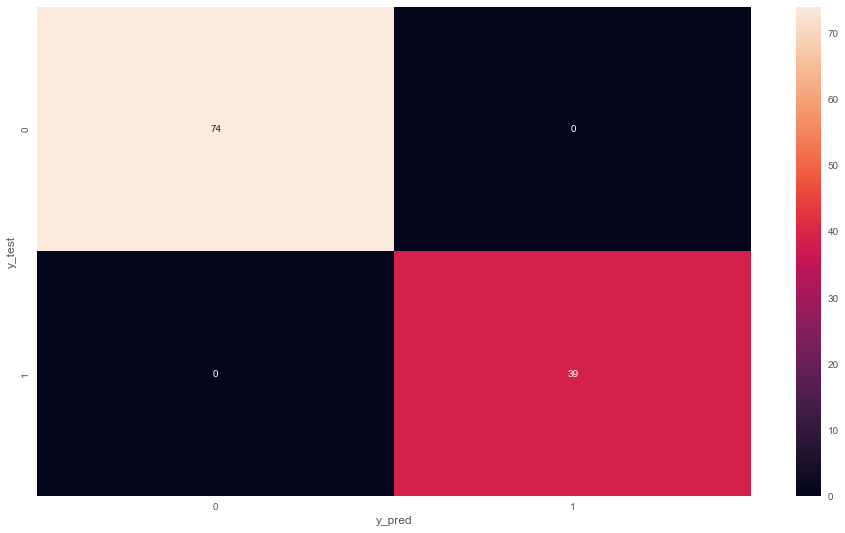

In [41]:
dat = {
    'y_test': y_test,
    'y_pred': y_pred
}

ev = pd.DataFrame(dat, columns=['y_test','y_pred'])

confusion_matrix = pd.crosstab(ev['y_test'], ev['y_pred'], rownames=['y_test'], colnames=['y_pred'])

sb.heatmap(confusion_matrix, annot=True)
plt.show()

<AxesSubplot:>

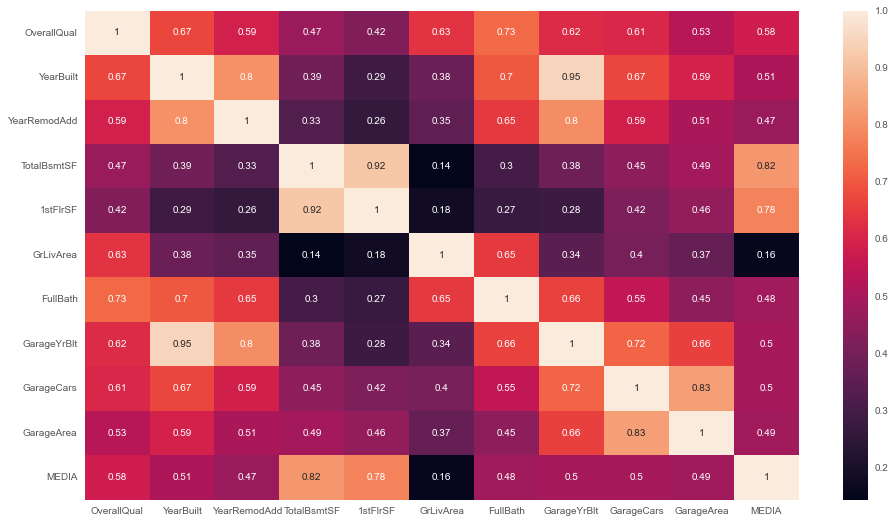

In [42]:
entrenamiento['KmeansCluster'] = kmeans.labels_
entrenamiento["ECONOMICA"] = np.where(entrenamiento["KmeansCluster"] == 2, 1, 0)

Cor_DI = entrenamiento[["OverallQual", "YearBuilt", "YearRemodAdd", "TotalBsmtSF", "1stFlrSF", "GrLivArea", "FullBath", 
                   "GarageYrBlt", "GarageCars", "GarageArea", "MEDIA"]]
correlacion = Cor_DI.corr()
fig, axis = plt.subplots()
sb.heatmap(correlacion, xticklabels=correlacion.columns, yticklabels=correlacion.columns, annot=True, ax=axis)

#### 4) Analice el modelo. Determine si hay multicolinealidad en las variables, y cuáles son las que aportan  al  modelo,  por  su  valor  de  significación.  Haga  un  análisis  de  correlación  de  las variables del modelo y especifique si el modelo se adapta bien a los datos. Explique si hay sobreajuste (overfitting) o no.

# Respuesta

#### 5. Utilice  el  modelo  con  el  conjunto  de  prueba  y  determine  la  eficiencia  del  algoritmo  para clasificar o predecir, en dependencia de las características de la variable respuesta.

### 6. Haga  un  análisis  de  la  eficiencia  del  algoritmo  usando  una  matriz  de  confusión.  Tenga  en cuenta la efectividad, donde el algoritmo se equivocó más, donde se equivocó menos y la importancia que tienen los errores.